In [32]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [33]:
#import dataset
data = pd.read_csv("/content/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [35]:
data1 = data.rename(columns = {'R&D Spend' :'RDS','Administration':'AS', 'Marketing Spend': 'MS'})
data1.head()

,RDS,AS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Here profit is dependent variable
and RDS, AS , MS are independent variables


In [36]:
data1[data1.duplicated()]

,RDS,AS,MS,State,Profit


No duplicate data

In [37]:
data1.describe()

,RDS,AS,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Correlation Analysis

In [38]:
data1.corr()

<ipython-input-38-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,RDS,AS,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
AS,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


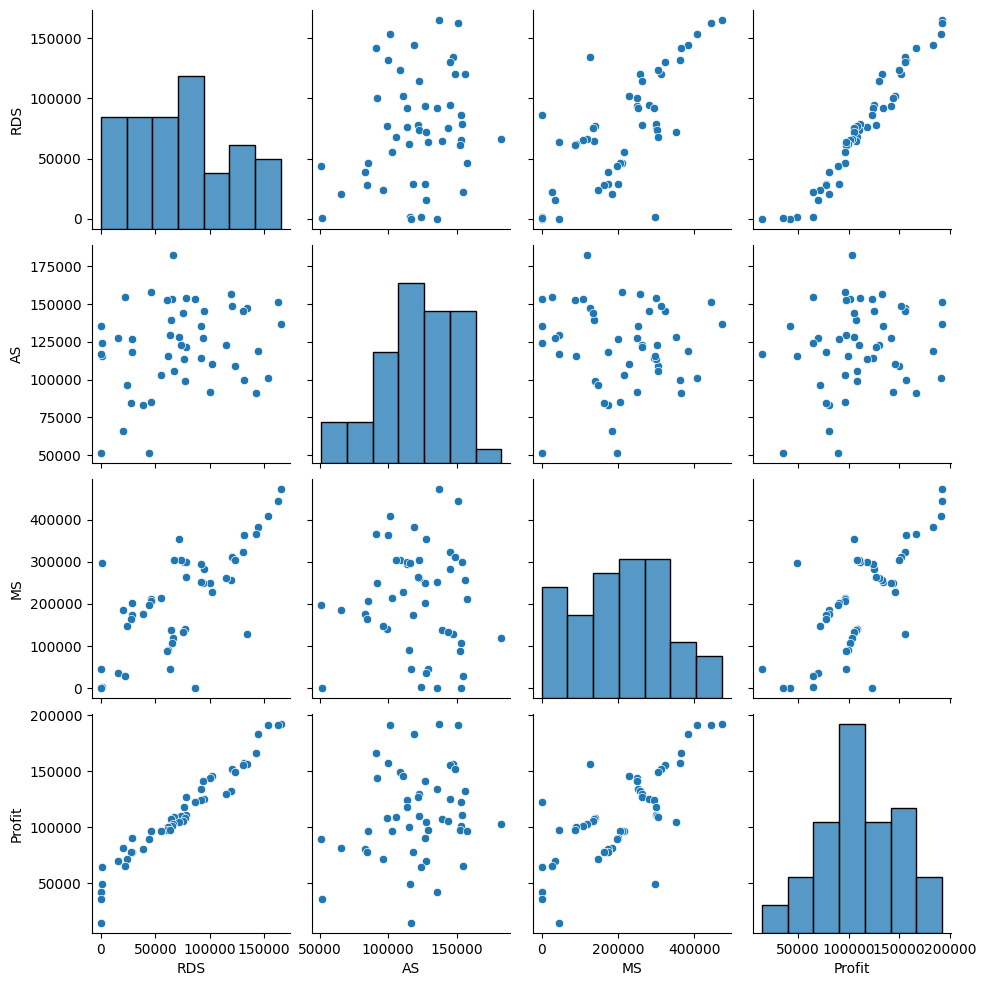

In [39]:
sns.pairplot(data1)

# Model Building

In [40]:
model = smf.ols('Profit ~ RDS+AS+MS', data = data1).fit()
model.params

Intercept    50122.192990
RDS              0.805715
AS              -0.026816
MS               0.027228
dtype: float64

In [41]:
round(model.pvalues,4)

Intercept    0.0000
RDS          0.0000
AS           0.6018
MS           0.1047
dtype: float64

p-values for two independent variabls ( AS and MS) are greater than level of significance. ( generally for 0.05)

In [42]:
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

Model accuracy is 95.07%

As AS and MS variables are insignificant, we will build SLR and MLR model for AS and MS

In [43]:
#for variable AS
mod1 = smf.ols('Profit~ AS', data = data1).fit()
mod1.pvalues

Intercept    0.003824
AS           0.162217
dtype: float64

p-value for AS is greater, so insignificant p-value

In [44]:
#for variable MS
mod2 = smf.ols('Profit~ MS', data = data1).fit()
mod2.pvalues

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64

MS has signifcant p-value

In [45]:
##for both variable MS and AS
mod3 = smf.ols('Profit~ MS + AS', data = data1).fit()
round(mod3.pvalues,4)

Intercept    0.2589
MS           0.0000
AS           0.0173
dtype: float64

When build the model using both columns, we have significant p-value.

# Model Validation Techniques
1) Variation Inflation factor (VIF) -
Collinearity check

Formula is : 1/ (1- R^2)

In [46]:
#for RDS
mod4 = smf.ols('RDS~ AS + MS',data = data1).fit()
mod4.rsquared

0.5949618224573936

In [47]:
#VIF for RDS
VIF_RDS = 1/(1- mod4.rsquared)
VIF_RDS

2.4689030699947017

In [48]:
#for MS
mod5 = smf.ols('MS~ AS + RDS',data = data1).fit()
#VIF for MS
VIF_MS = 1/(1- mod5.rsquared)
VIF_MS

2.326773290530878

In [49]:
#for AS
mod6 = smf.ols('AS~ MS + RDS',data = data1).fit()
#VIF for AS
VIF_AS = 1/(1- mod6.rsquared)
VIF_AS

1.1750910070550453

In [50]:
#VIF in dataframe
d1 = {'Variables':['RDS','MS','AS'],'VIF': [VIF_RDS,VIF_MS,VIF_AS]}
VIF_frame = pd.DataFrame(d1)
VIF_frame

,Variables,VIF
0,RDS,2.468903
1,MS,2.326773
2,AS,1.175091


As All VIF values are less than 5, sp there is no multicollinearity problem., So consider all the variables in regression model.

# Residual Analysis

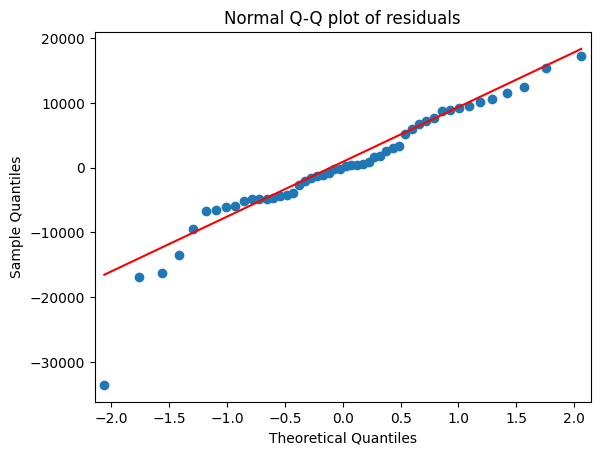

In [51]:
QQ = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Most of the points lies on the red line, so it approximately follows normal distribution.

In [52]:
list(np.where(model.resid <-30000))

[array([49])]

# Residual plot for Homoscedasticity or Heteroscedasticity

In [53]:
def get_standarized_values(x):
  eqn = (x- x.mean())/x.std()
  return eqn

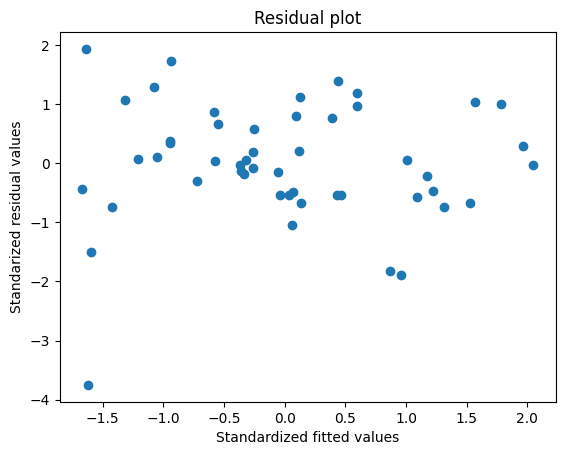

In [54]:
plt.scatter(get_standarized_values(model.fittedvalues), get_standarized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standarized residual values')
plt.show()

It shows random scattered of points

# Residual Vs Regressors

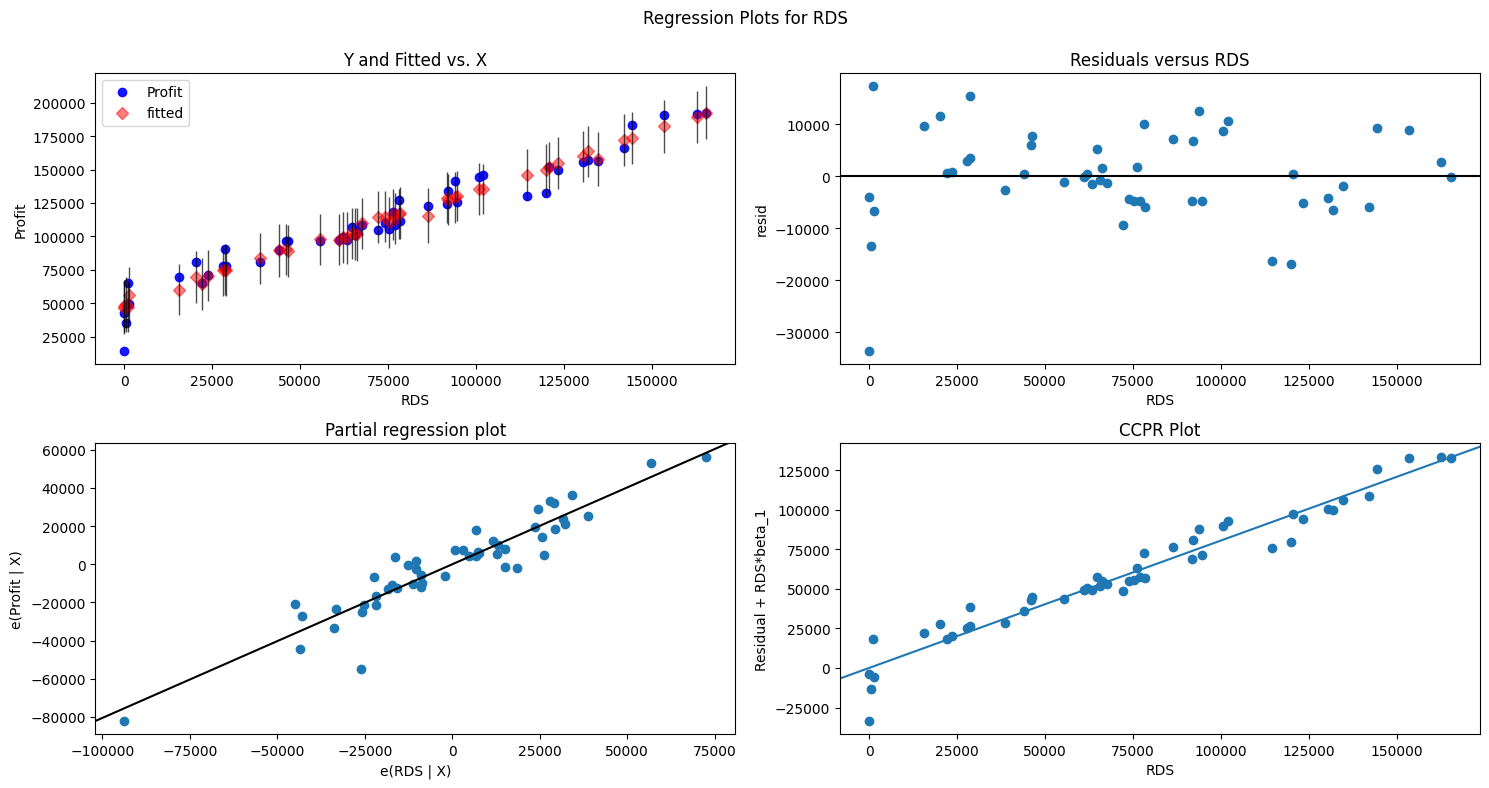

In [55]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,"RDS", fig = fig)
plt.show()

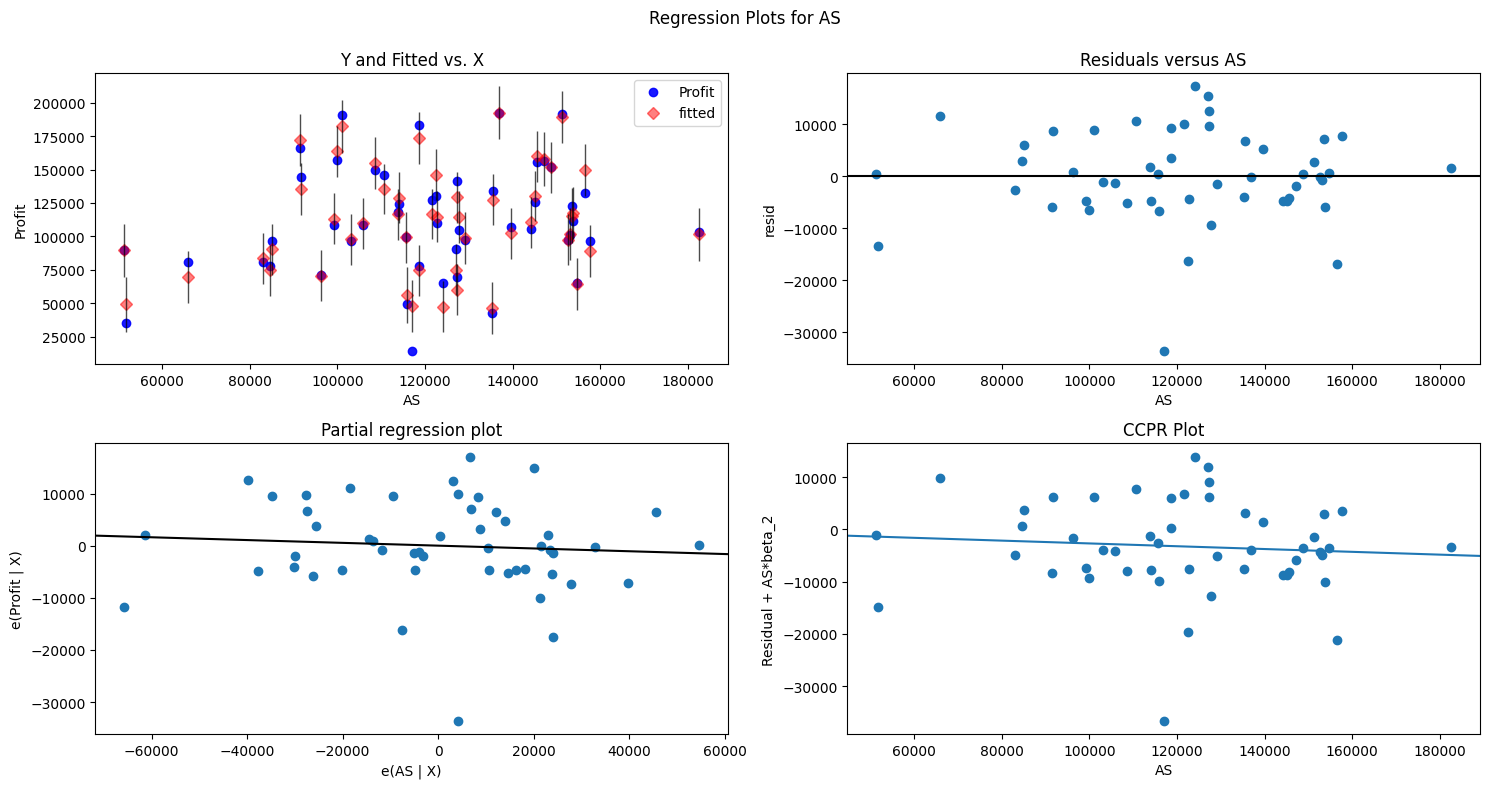

In [56]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,"AS", fig = fig)
plt.show()

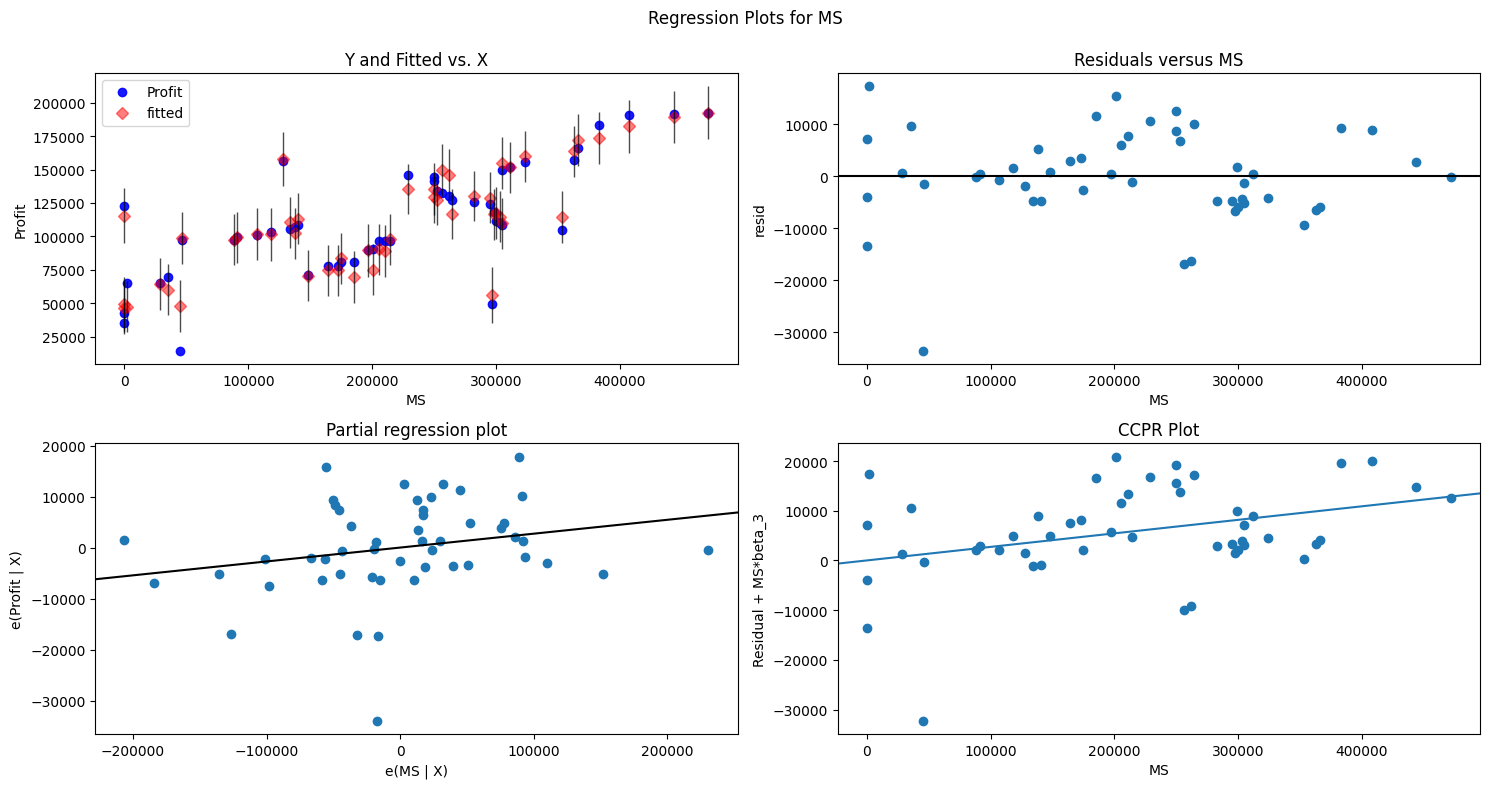

In [57]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,"MS", fig = fig)
plt.show()

# Model Deletion Diagnostics

# Detecting outliers
Cooks Distance
If cooks distance is > 1 , then it is an outlier.

In [58]:
model_influence = model.get_influence()
(c, _)= model_influence.cooks_distance

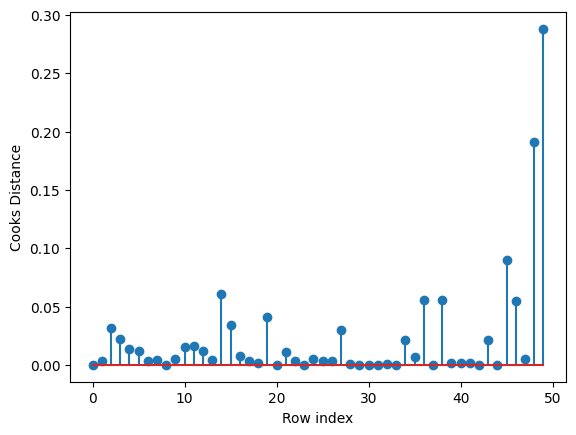

In [59]:
#plot the influencers using stem plot
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
np.argmax(c), np.max(c)  #c > 0.25

(49, 0.2880822927543272)

All cooks distance values are les than 1. so, no outliers

# High Influence Plots

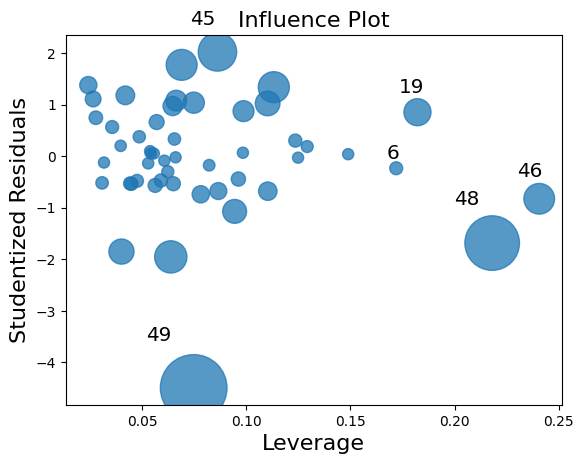

In [61]:
fig = influence_plot(model)

In [62]:
data1.shape

(50, 5)

In [63]:
k = data1.shape[1] #no. features
n = data1.shape[0] #no. rows/observations

leverage_cutoff =3*((k+1)/n)
leverage_cutoff

0.36

In [68]:
data1[data1.index.isin([49])]

,RDS,AS,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [70]:
#discard the dat points which are influencers
data2 = data1.drop(data1.index[[49]], axis =0).reset_index(drop = True)
data2

,RDS,AS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagonstics and Final Model

In [72]:
Final_model = smf.ols('Profit ~ RDS + MS+AS', data = data2).fit()
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           8.85e-32
Time:                        09:23:43   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
AS            -0.0222      0.043     -0.518      0.607      -0.109       0.064
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Accuracy of model has improved to 96.1%

# Model Predictions

In [64]:
new_data = pd.DataFrame({'RDS': 78000, 'AS': 127864.5 ,'MS': 249839.44}, index = [1])
new_data

,RDS,AS,MS
1,78000,127864.5,249839.44


In [74]:
Final_model.predict(new_data)

1    116922.173312
dtype: float64

In [75]:
#automatic prediction
pred = Final_model.predict(data1)
pred

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
49     50925.119153


In [80]:
#Table for R^2 values
d2 = {'Models': ['Model', 'Final_Model'], 'Rsquared': [model.rsquared, Final_model.rsquared]}
table = pd.DataFrame(d2)
table

,Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
